## Plotting boundaires of HxC planes with different number of bins.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
lag = 512 # {32, 64, 128, 256, 512} Choose one of them

base = pd.read_pickle('../pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

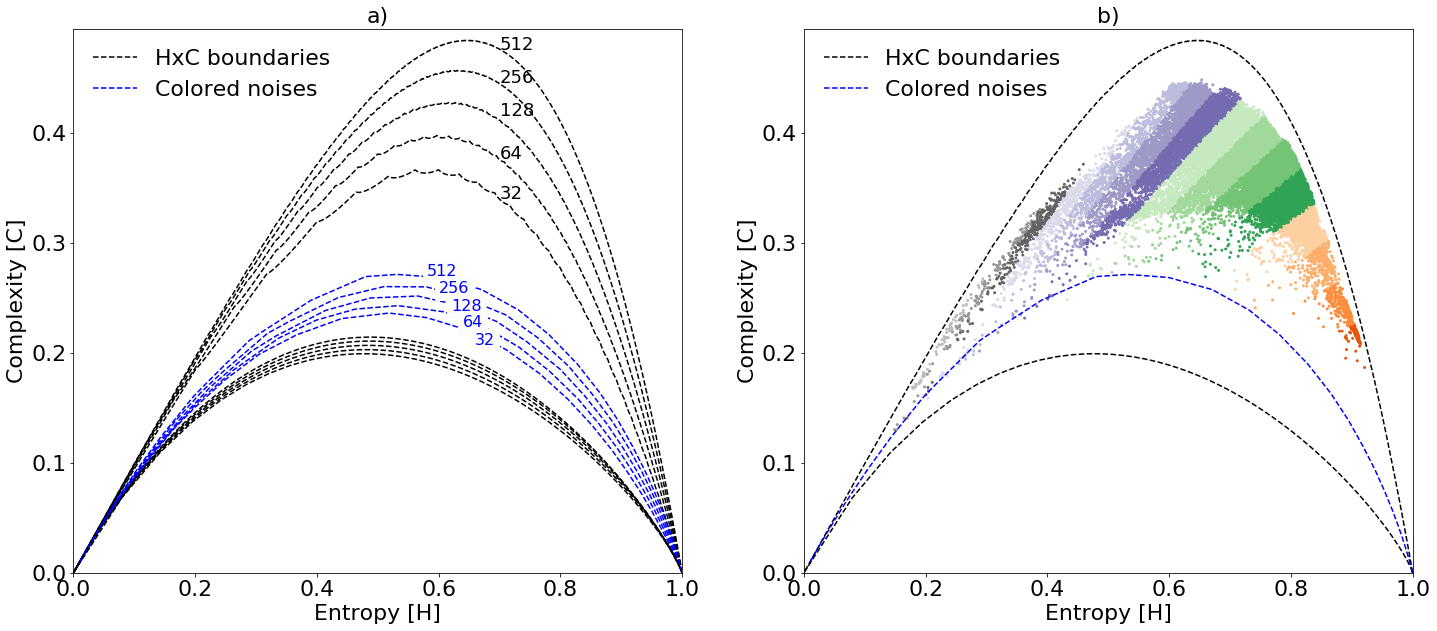

In [3]:
plt.figure(figsize=(24,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.subplot(1,2,1)
lags = [32, 64, 128, 256, 512]
for lag in lags:
    cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
    noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

    if lag == 32:
        plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
        plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
    else:
        plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = '')
        plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = '')

plt.text(0.7, 0.475, '512', fontsize= 18)
plt.text(0.7, 0.445, '256', fontsize= 18)
plt.text(0.7, 0.415, '128', fontsize= 18)
plt.text(0.7, 0.376, '64', fontsize= 18)
plt.text(0.7, 0.34, '32', fontsize= 18)

plt.text(0.58, 0.27, '512', fontsize= 16, color='blue', backgroundcolor='0.99')
plt.text(0.6, 0.254, '256', fontsize= 16, color='blue', backgroundcolor='0.99')
plt.text(0.62, 0.238, '128', fontsize= 16, color='blue', backgroundcolor='0.99')
plt.text(0.64, 0.223, '64', fontsize= 16, color='blue', backgroundcolor='0.99')
plt.text(0.66, 0.207, '32', fontsize= 16, color='blue', backgroundcolor='0.99')

plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)
plt.title('a)')

plt.subplot(1,2,2)
plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)

plt.scatter(base['H'], base['C'], marker='.', s=15, c=base['JSD'], norm=plt.Normalize(vmax=1, vmin=0),
            cmap = 'tab20c')
plt.title('b)')

plt.savefig('./figures/Fig1.eps', format="eps", bbox_inches='tight')

plt.show()